In [2]:
crest_paths = {
    "Arsenal": "Arsenal-FC-logo-480x480.png",
    "Aston Villa": "Aston-Villa-FC-logo-480x480.png",
    "Bournemouth": "AFC-Bournemouth-logo-480x480.png",
    "Brentford": "Brentford-FC-logo-480x480.png",
    "Brighton": "Brighton-Hove-Albion-logo-480x480.png",
    "Chelsea": "Chelsea-FC-logo-480x480.png",
    "Cry. Palace": "Crystal-Palace-FC-logo-480x480.png",
    "Everton": "Everton-FC-logo-480x480.png",
    "Fulham": "Fulham-FC-logo-480x480.png",
    "Liverpool": "Liverpool-FC-logo-480x480.png",
    "Man. City": "Manchester-City-FC-logo-480x480.png",
    "Man. Utd": "Manchester-United-FC-logo-480x480.png",
    "Newcastle": "Newcastle-United-logo-480x480.png",
    "Nott Forest": "Nottingham-Forest-FC-logo-480x480.png",
    "Spurs": "Tottenham-Hotspur-logo-480x480.png",
    "West Ham": "West-Ham-United-FC-logo-480x480.png",
    "Wolves": "Wolverhampton-Wanderers-logo-480x480.png"}

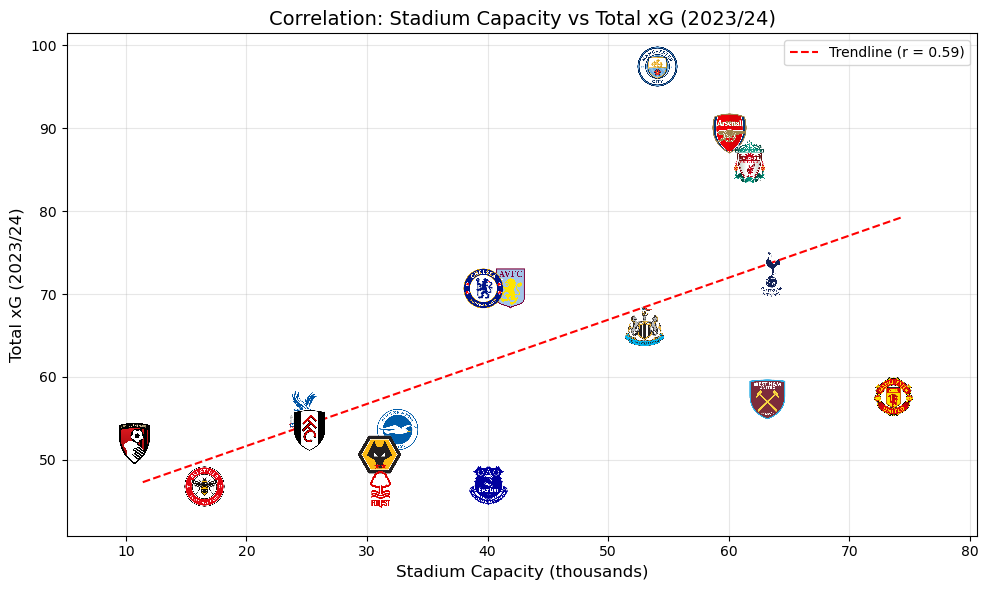

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

stadium_capacity = [53.4, 60.7, 61.0, 42.6, 62.8, 40.3, 52.3, 74.3, 62.5, 25.5, 
                    31.8, 11.4, 24.5, 31.7, 39.4, 17.2, 30.4]

total_xg = [96.4, 88.4, 87.0, 71.6, 71.3, 69.6, 67.1, 58.6, 56.2, 54.9, 
            54.6, 52.9, 52.5, 49.6, 47.9, 47.8, 45.9]

teams = ['Man. City', 'Arsenal', 'Liverpool', 'Aston Villa', 'Spurs',
    'Chelsea', 'Newcastle', 'Man. Utd', 'West Ham', 'Cry. Palace',
    'Brighton', 'Bournemouth', 'Fulham', 'Wolves', 'Everton',
    'Brentford', 'Nott Forest']

# --- Correlation ---
correlation = np.corrcoef(stadium_capacity, total_xg)[0, 1]

# --- Line of best fit ---
z = np.polyfit(stadium_capacity, total_xg, 1)
p = np.poly1d(z)
x_line = np.linspace(min(stadium_capacity), max(stadium_capacity), 100)
y_line = p(x_line)

plt.figure(figsize=(10, 6))

offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

for i, team in enumerate(teams):

    img = plt.imread(crest_paths[team])

    base_zoom = 0.07
    zoom_level = base_zoom / 2.5 if team == "Bournemouth" else base_zoom

    imagebox = OffsetImage(img, zoom=zoom_level)

    dx, dy = offsets[i % 4]

    ab = AnnotationBbox(
        imagebox,
        (stadium_capacity[i], total_xg[i]),
        xybox=(dx, dy),
        xycoords='data',
        boxcoords="offset points",
        frameon=False)

    plt.gca().add_artist(ab)

plt.plot(x_line, y_line, "r--",
         label=f"Trendline (r = {correlation:.2f})")

x_margin = (max(stadium_capacity) - min(stadium_capacity)) * 0.1
y_margin = (max(total_xg) - min(total_xg)) * 0.1

plt.xlim(min(stadium_capacity) - x_margin, max(stadium_capacity) + x_margin)
plt.ylim(min(total_xg) - y_margin, max(total_xg) + y_margin)

plt.xlabel('Stadium Capacity (thousands)', fontsize=12)
plt.ylabel('Total xG (2023/24)', fontsize=12)
plt.title('Correlation: Stadium Capacity vs Total xG (2023/24)', fontsize=14)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

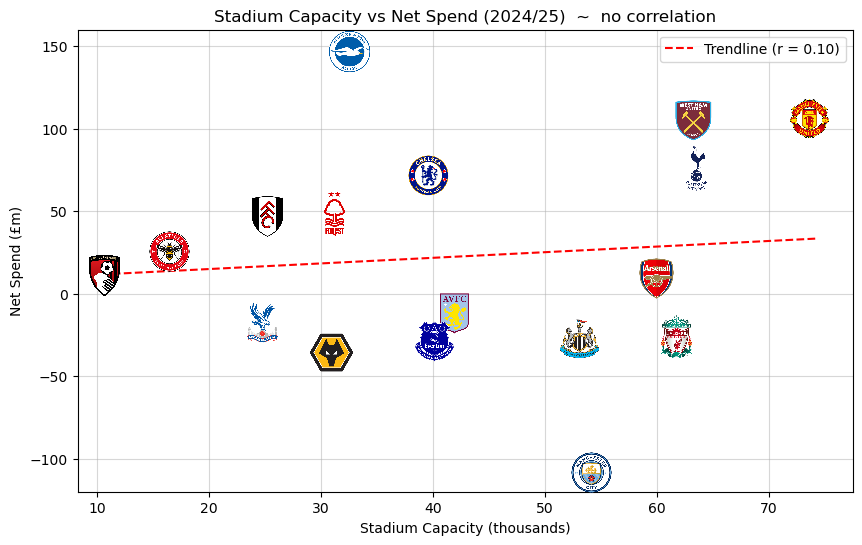

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

teams = ['Man. City', 'Arsenal', 'Liverpool', 'Aston Villa', 'Spurs',
    'Chelsea', 'Newcastle', 'Man. Utd', 'West Ham', 'Cry. Palace',
    'Brighton', 'Bournemouth', 'Fulham', 'Wolves', 'Everton',
    'Brentford', 'Nott Forest']

stadium_capacity = np.array([
    53.4, 60.7, 61.0, 42.6, 62.8, 40.3, 52.3, 74.3, 62.5,
    25.5, 31.8, 11.4, 24.5, 31.7, 39.4, 17.2, 30.4
])

net_spend_24_25 = [
    ("Arsenal", 4.0),
    ("Aston Villa", -6.9),
    ("Bournemouth", 15.7),
    ("Brentford", 30.5),
    ("Brighton", 151.5),
    ("Chelsea", 66.3),
    ("Cry. Palace", -22.3),
    ("Everton", -24.2),
    ("Fulham", 41.6),
    ("Liverpool", -21.0),
    ("Man. City", -113.3),
    ("Man. Utd", 111.2),
    ("Newcastle", -22.0),
    ("Nott Forest", 43.3),
    ("Spurs", 70.6),
    ("West Ham", 100.0),
    ("Wolves", -40.7)]

spend_dict = dict(net_spend_24_25)

net_spend = np.array([spend_dict[team] for team in teams])

correlation = np.corrcoef(stadium_capacity, net_spend)[0, 1]

slope, intercept = np.polyfit(stadium_capacity, net_spend, 1)
x_line = np.linspace(min(stadium_capacity), max(stadium_capacity), 100)
y_line = slope * x_line + intercept

plt.figure(figsize=(10, 6))

offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

for i, team in enumerate(teams):

    img = plt.imread(crest_paths[team])

    base_zoom = 0.07
    zoom_level = base_zoom / 2.5 if team == "Bournemouth" else base_zoom

    imagebox = OffsetImage(img, zoom=zoom_level)

    dx, dy = offsets[i % 4]

    ab = AnnotationBbox(
        imagebox,
        (stadium_capacity[i], net_spend[i]),
        xybox=(dx, dy),
        xycoords='data',
        boxcoords="offset points",
        frameon=False
    )

    plt.gca().add_artist(ab)


plt.plot(x_line, y_line, "r--",
         label=f"Trendline (r = {correlation:.2f})")

plt.xlabel('Stadium Capacity (thousands)')
plt.ylabel('Net Spend (£m)')
plt.title('Stadium Capacity vs Net Spend (2024/25)  ~  no correlation')
plt.ylim(-120,160)
plt.legend()
plt.grid(alpha=0.5)    # no correlation

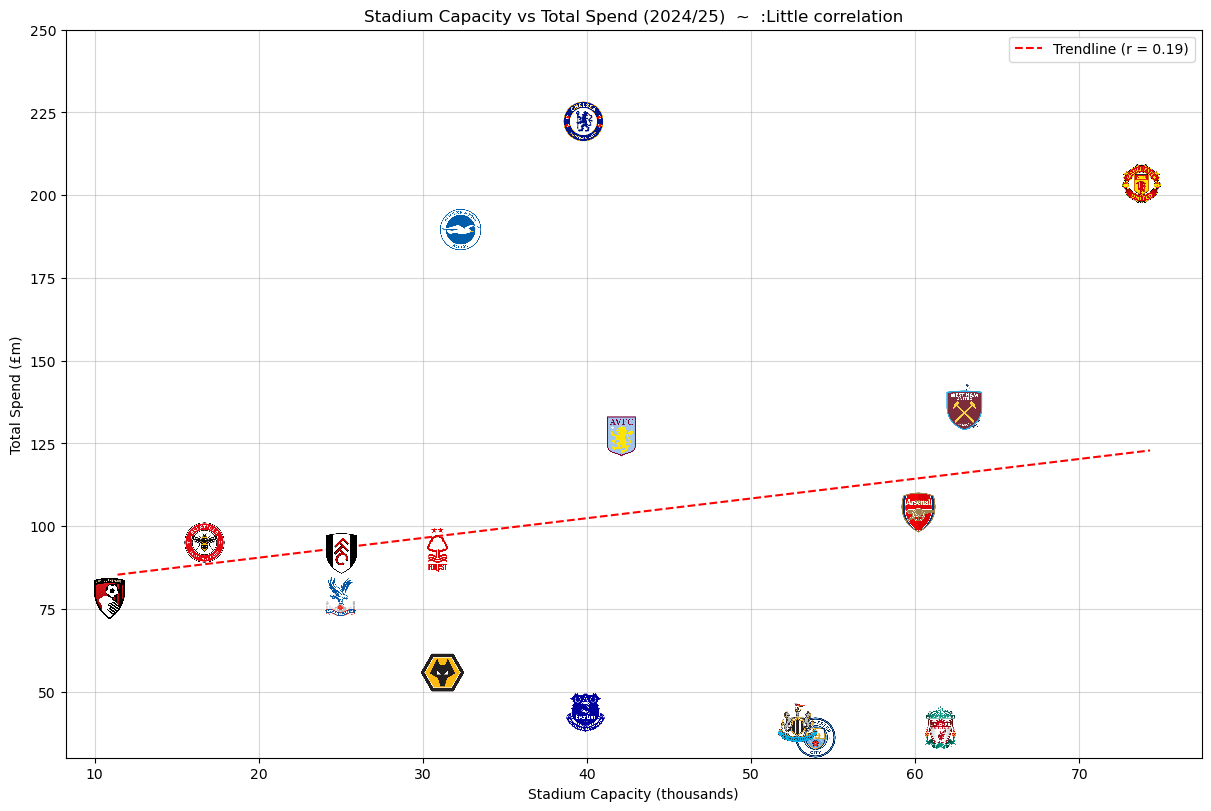

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# --- Teams in EXACT stadium order ---
teams = [
    'Man. City', 'Arsenal', 'Liverpool', 'Aston Villa', 'Spurs',
    'Chelsea', 'Newcastle', 'Man. Utd', 'West Ham', 'Cry. Palace',
    'Brighton', 'Bournemouth', 'Fulham', 'Wolves', 'Everton',
    'Brentford', 'Nott Forest']

stadium_capacity = np.array([
    53.4, 60.7, 61.0, 42.6, 62.8, 40.3, 52.3, 74.3, 62.5,
    25.5, 31.8, 11.4, 24.5, 31.7, 39.4, 17.2, 30.4])

club_spend_24_25 = [
    ("Arsenal", 101.5),
    ("Aston Villa", 129.5),
    ("Bournemouth", 80.7),
    ("Brentford", 97.5),
    ("Brighton", 192.0),
    ("Chelsea", 219.6),
    ("Cry. Palace", 76.0),
    ("Everton", 46.0),
    ("Fulham", 89.0),
    ("Liverpool", 41.5),
    ("Man. City", 33.6),
    ("Man. Utd", 205.9),
    ("Newcastle", 43.0),
    ("Nott Forest", 90.3),
    ("Spurs", 133.5),
    ("West Ham", 132.5),
    ("Wolves", 53.3)]

spend_dict = dict(club_spend_24_25)

# --- Align spend strictly to stadium order ---
spend = np.array([spend_dict[team] for team in teams])

# --- Correlation ---
correlation = np.corrcoef(stadium_capacity, spend)[0, 1]

# --- Trendline ---
slope, intercept = np.polyfit(stadium_capacity, spend, 1)
x_line = np.linspace(min(stadium_capacity), max(stadium_capacity), 100)
y_line = slope * x_line + intercept

plt.figure(figsize=(12, 8), constrained_layout=True)

offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

for i, team in enumerate(teams):

    img = plt.imread(crest_paths[team])

    base_zoom = 0.07
    zoom_level = base_zoom / 2.5 if team == "Bournemouth" else base_zoom

    imagebox = OffsetImage(img, zoom=zoom_level)

    dx, dy = offsets[i % 4]

    ab = AnnotationBbox(
        imagebox,
        (stadium_capacity[i], spend[i]),
        xybox=(dx, dy),
        xycoords='data',
        boxcoords="offset points",
        frameon=False)

    plt.gca().add_artist(ab)

plt.plot(x_line, y_line, "r--",
         label=f"Trendline (r = {correlation:.2f})")

plt.xlabel('Stadium Capacity (thousands)')
plt.ylabel('Total Spend (£m)')
plt.title('Stadium Capacity vs Total Spend (2024/25)  ~  :Little correlation')
plt.legend()
plt.ylim(30,250)
plt.grid(alpha=0.5)